In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data.shape

(1797, 64)

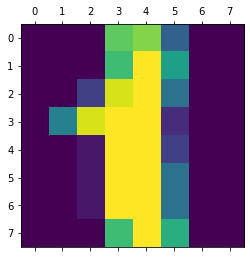

In [11]:
plt.gray
plt.matshow(digits.images[1])
plt.show()

In [13]:
digits.data[0].shape # 8X8 materix

(64,)

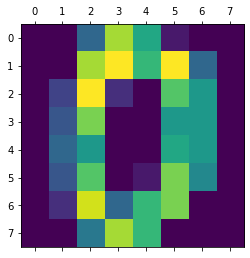

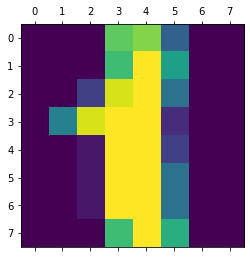

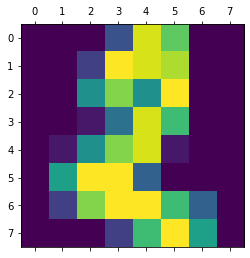

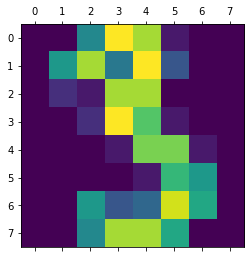

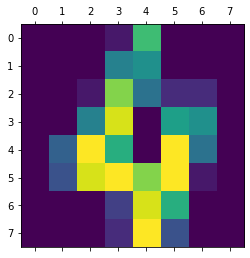

In [14]:
# print 5 digit 
plt.gray
for i in range(5):
    plt.matshow(digits.images[i])
    plt.show()

In [15]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
digits.target[1:5]

array([1, 2, 3, 4])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [21]:
len(X_test)

540

In [22]:
len(X_train)

1257

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
model.score(X_test, y_test)


0.9611111111111111

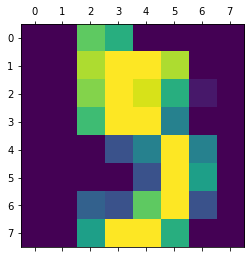

In [29]:
plt.matshow(digits.images[5])

In [30]:
digits.target[5]

5

In [32]:
model.predict([digits.data[5]])

array([5])

In [33]:
model.predict(digits.data[0:5])


array([0, 1, 2, 3, 4])

 now we want to check where our prediction failed so that we create confusion matterix

In [34]:
y_predicted = model.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[43,  0,  0,  0,  2,  0,  2,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 56,  0,  1,  0,  0,  1,  1],
       [ 0,  2,  0,  0, 58,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 54,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 57,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 56]], dtype=int64)

Text(69.0, 0.5, 'Truth')

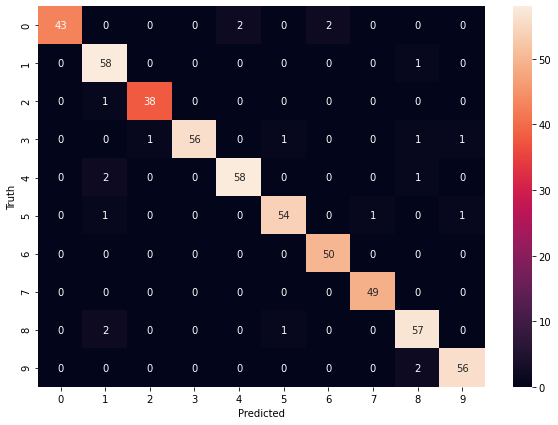

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')